<a href="https://colab.research.google.com/github/tnguyen7s/ai-cloud-club-semo/blob/master/colab_notebooks/aic_mnist_fc_03092023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import packages

In [ ]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, SubsetRandomSampler
import matplotlib.pyplot as plt
import torch.nn as nn


# Set up Device for training

In [ ]:
GPU = torch.cuda.is_available()

if GPU:
  device = torch.device('cuda')
  print('Using GPU')
else:
  device = torch.device('cpu')
  print('Using CPU')

Using GPU


# Data

In [ ]:
transformer = transforms.Compose([
    transforms.Resize((20,20)),
    transforms.Grayscale(),
    transforms.ToTensor(),
    transforms.Normalize(mean=(0,), std=(1,))
])

In [ ]:
train_dataset = datasets.MNIST('./sample_data', train=True, transform=transformer, download=True)
test_dataset = datasets.MNIST('./sample_data', train=False, transform=transformer, download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./sample_data/MNIST/raw/train-images-idx3-ubyte.gz to ./sample_data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./sample_data/MNIST/raw/train-labels-idx1-ubyte.gz to ./sample_data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./sample_data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./sample_data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./sample_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./sample_data/MNIST/raw



In [ ]:
BATCH_SIZE=128 # each training iteration, use 128 images and its labels

In [ ]:
from torch.utils.data.sampler import SubsetRandomSampler
# for training
train_loader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, sampler=SubsetRandomSampler(range(50000)))
# for validation
val_loader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, sampler=SubsetRandomSampler(range(50000, 60000)))

test_loader = DataLoader(dataset=test_dataset, batch_size=BATCH_SIZE, shuffle=True)

In [ ]:
train_iter = iter(train_loader)

In [ ]:
next(train_iter)

[tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           ...,
           [0.0000, 0.0000, 0.0078,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],
 
 
         [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           ...,
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],
 
 
         [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000

In [ ]:
data, target = next(train_iter)

In [ ]:
data.shape
# 128 is the number of images; batch size
# 1 is the number of color channel
# 20 is the width
# 20 is the height

torch.Size([128, 1, 20, 20])

In [ ]:
target.shape

torch.Size([128])

In [ ]:
target

tensor([9, 0, 2, 7, 1, 0, 5, 0, 7, 2, 5, 2, 7, 0, 3, 7, 8, 5, 1, 9, 5, 0, 6, 3,
        6, 0, 3, 7, 6, 8, 5, 6, 7, 4, 4, 4, 7, 0, 0, 3, 1, 2, 3, 8, 9, 8, 3, 5,
        7, 9, 5, 6, 4, 1, 7, 7, 4, 4, 7, 1, 2, 0, 9, 5, 2, 8, 9, 4, 2, 0, 9, 1,
        3, 8, 4, 0, 7, 6, 4, 3, 2, 6, 0, 9, 7, 3, 1, 8, 7, 7, 0, 3, 4, 0, 9, 8,
        6, 4, 5, 2, 3, 4, 6, 3, 4, 3, 0, 2, 0, 6, 5, 1, 6, 6, 7, 4, 5, 3, 3, 8,
        3, 1, 0, 7, 6, 2, 2, 0])

In [ ]:
target.unique() # labels for training

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

# Image Show

In [ ]:
def imshow(tensor_image):
  np_image = tensor_image.numpy()

  plt.imshow(np_image)
  plt.axis('off')
  plt.show()

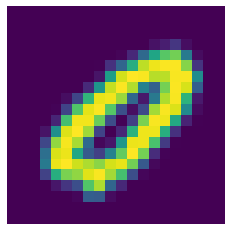

tensor(0)


In [ ]:
imshow(data[5,0])
print(target[5])

# Fully Connected Model

In [ ]:
def create_fc_model_v1():
  model = nn.Sequential([
      nn.Linear(in_features=400, out_features=200),
      nn.ReLU(), #non linear function
      nn.Linear(in_features=200, out_features=314),
      nn.RELU(),
      nn.Linear(in_features=314, out_features=146),
      nn.ReLU(),
      nn.Linear(in_features=146, out_features=400),
      nn.ReLU(),
      nn.Linear(in_features=400, out_features=10)
  ])

  return model

# Optimizer

# Training function

# Testing function

# Create a model and train

# Visualize and performance